<a href="https://colab.research.google.com/github/BRMOxp/Propensao-de-Adesao/blob/main/PropensaoAdesao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('database.db')

In [2]:
consulta_atividade = """

  SELECT
    *
  FROM flight_activity fa LEFT JOIN flight_loyalty_history flh ON (fa.loyalty_number = flh.loyalty_number)

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )

df_atividade.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


#Exercicios SQL 01

##Selecione as colunas: loyalty_number, year, month, flights_booked, total_flights, distance e points_accumulated da tabela "flight_activity".


In [ ]:
consulta_atividade = """
  SELECT
      fa.loyalty_number,
      fa.year,
      fa.flights_booked,
      fa.total_flights,
      fa.distance,
      fa.points_accumulated
  FROM flight_activity fa

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,year,flights_booked,total_flights,distance,points_accumulated
0,100018,2017,3,3,1521,152.0
1,100102,2017,10,14,2030,203.0
2,100140,2017,6,6,1200,120.0
3,100214,2017,0,0,0,0.0
4,100272,2017,0,0,0,0.0


##Selecione as mesma colunas, porém recupere somente as linhas cuja coluna distance é maior do que 2000 e a coluna month é igual a 9, da tabela "flight_activity".

In [ ]:
consulta_atividade = """
  SELECT
      fa.loyalty_number,
      fa.month,
      fa.year,
      fa.flights_booked,
      fa.total_flights,
      fa.distance,
      fa.points_accumulated
  FROM
    flight_activity fa
  WHERE
    fa.distance > 2000 AND fa.month = 9

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,month,year,flights_booked,total_flights,distance,points_accumulated
0,863070,9,2017,8,15,4245,424.0
1,691626,9,2018,8,15,4245,424.0
2,444931,9,2017,11,18,4428,442.0
3,409051,9,2018,11,18,4428,442.0
4,975387,9,2018,13,18,4428,442.0


##Selecione as mesma colunas, porém recupere somente as linhas cuja coluna loyalty_card é igual a Star, da tabela "flight_activity".

In [ ]:
consulta_atividade = """
  SELECT
      fa.loyalty_number,
      flh.loyalty_card,
      fa.month,
      fa.year,
      fa.flights_booked,
      fa.total_flights,
      fa.distance,
      fa.points_accumulated
  FROM
    flight_activity fa LEFT JOIN flight_loyalty_history flh
  WHERE
    flh.loyalty_card = 'Star'
  LIMIT 10
"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,loyalty_card,month,year,flights_booked,total_flights,distance,points_accumulated
0,100018,Star,1,2017,3,3,1521,152.0
1,100018,Star,1,2017,3,3,1521,152.0
2,100018,Star,1,2017,3,3,1521,152.0
3,100018,Star,1,2017,3,3,1521,152.0
4,100018,Star,1,2017,3,3,1521,152.0


#Inspecionando Dados

In [ ]:
consulta_atividade = """
  SELECT
  *
  FROM
  flight_activity fa LEFT JOIN flight_loyalty_history flh
  ON (fa.loyalty_number = flh.loyalty_number )
"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [ ]:
# verificando a quantidade de linhas
numero_linhas = df_atividade.shape[0]
print( 'O numero de linhas é:', numero_linhas )
# verificando a quantidade de colunas
numero_colunas = df_atividade.shape[1]
print( 'O numero de linhas é:', numero_linhas )
# descobrindo as informacoes gerais sobre a planilha de dados
df_atividade.info()
# Somar a colunas "total_flights"
total_flights_sum = df_atividade.loc[:, 'total_flights'].sum()
# Somar a colunas "distance"
distance_sum = df_atividade.loc[:, 'distance'].mean()
# Valor mínimo de salário
min_salary = df_atividade.loc[:, 'distance'].min()
# Valor máximo de salário
max_salary = df_atividade.loc[:, 'distance'].max()
# checando o número de dados faltante nas colunas
missing_data = df_atividade.isna().sum()
print(f'O total da soma de vôos é: {total_flights_sum}')
print(f'O total da soma de distância é: {distance_sum}')
print(f'O menor salário é: {min_salary}')
print(f'O maior salário é: {max_salary}')
print(f'O total de dados faltantes em cada coluna: \n {missing_data}')


O numero de linhas é: 405624
O numero de linhas é: 405624
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               405624 non-null  int64  
 1   year                         405624 non-null  int64  
 2   month                        405624 non-null  int64  
 3   flights_booked               405624 non-null  int64  
 4   flights_with_companions      405624 non-null  int64  
 5   total_flights                405624 non-null  int64  
 6   distance                     405624 non-null  int64  
 7   points_accumulated           405624 non-null  float64
 8   points_redeemed              405624 non-null  int64  
 9   dollar_cost_points_redeemed  405624 non-null  int64  
 10  loyalty_number               405624 non-null  int64  
 11  country                      405624 non-null  object 
 12  

In [ ]:
# Comando do Pandas para selecionar linhas e colunas
#df = df1.iloc[linhas, colunas]
# selecionando colunas de uma planilha
colunas = ['year', 'month', 'flights_booked', 'flights_with_companions',
'total_flights', 'distance', 'points_accumulated', 'points_redeemed',
'dollar_cost_points_redeemed', 'salary', 'clv', 'enrollment_year',
'enrollment_month', 'loyalty_card']
df_dados_limpos = df_atividade.loc[:, colunas]
df_dados_limpos.head()

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,salary,clv,enrollment_year,enrollment_month,loyalty_card
0,2017,1,3,0,3,1521,152.0,0,0,92552.0,7919.20,2016,8,Aurora
1,2017,1,10,4,14,2030,203.0,0,0,NaN,2887.74,2013,3,Nova
2,2017,1,6,0,6,1200,120.0,0,0,NaN,2838.07,2016,7,Nova
3,2017,1,0,0,0,0,0.0,0,0,63253.0,4170.57,2015,8,Star
4,2017,1,0,0,0,0,0.0,0,0,91163.0,6622.05,2014,1,Star


#Exercicios SQL 02


##Selecionar os números do cartão de fidelidade dos passeiros, a cidade e o gênero, dos passageiros que tem o cartão Star de fidelidade, mas nunca realizaram nenhuma viagem de avião

In [ ]:
consulta_atividade = """
  SELECT
    fa.loyalty_number,
    flh.city,
    flh.gender,
    flh.loyalty_card
  FROM
    flight_activity fa LEFT JOIN flight_loyalty_history flh
  ON (fa.loyalty_number = flh.loyalty_number)
  WHERE
    fa.distance = 0 AND flh.loyalty_card = "Star"

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,city,gender,loyalty_card
0,480934,Toronto,Female,Star
1,480934,Toronto,Female,Star
2,480934,Toronto,Female,Star
3,480934,Toronto,Female,Star
4,549612,Edmonton,Male,Star


##Selecionar os números do cartão de fidelidade, o gênero e a cidade de todos os passageiros do sexo feminino que moram na cidade de Toronto, fizeram mais de 30 viagens no total e tem o cartão de fidelidade do tipo Aurora.


In [ ]:
consulta_atividade = """
    SELECT
      fa.loyalty_number,
      fa.total_flights,
      flh.city,
      flh.gender,
      flh.loyalty_card
  FROM
    flight_activity fa LEFT JOIN flight_loyalty_history flh
  ON (fa.loyalty_number = flh.loyalty_number)
  WHERE
    flh.gender = "Female"
    AND flh.city = "Toronto"
    AND fa.total_flights = 30
    AND flh.loyalty_card = "Aurora"

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,total_flights,city,gender,loyalty_card
0,896861,30,Toronto,Female,Aurora
1,442792,30,Toronto,Female,Aurora
2,856496,30,Toronto,Female,Aurora
3,615411,30,Toronto,Female,Aurora


##Selecionar os números do cartão de fidelidade, o tipo do cartão, o genero e os pontos acumulados, dos passageiros com salário acima de 13200, estado civil como casado e nível acadêmico como mestrado e número de voos agendados igual ao número total de voos.


In [ ]:
consulta_atividade = """
    SELECT
      fa.loyalty_number,
      flh.loyalty_card,
      flh.gender,
      fa.points_accumulated
    FROM
      flight_activity fa LEFT JOIN flight_loyalty_history flh
    ON ( fa.loyalty_number = flh.loyalty_number )
    WHERE
      flh.salary > 132000
      AND flh.marital_status = "Married"
      AND flh.education = "Master"
      AND ( fa.total_flights = fa.flights_booked )

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )
df_atividade.head()

,loyalty_number,loyalty_card,gender,points_accumulated
0,410982,Star,Male,0.0
1,410982,Star,Male,0.0
2,410982,Star,Male,0.0
3,410982,Star,Male,0.0
4,410982,Star,Male,0.0


#Preparação dos Dados


In [15]:
consulta_atividade = """

  SELECT
    *
  FROM flight_activity fa LEFT JOIN flight_loyalty_history flh ON (fa.loyalty_number = flh.loyalty_number)

"""
df_atividade = pd.read_sql_query( consulta_atividade, conn )

df_atividade.head()
# Numero de dados faltantes
df_atividade.isna().sum()
# selecionando somente as colunas numéricas úteis e o rótulo
colunas=["year","month","flights_booked","flights_with_companions","total_flights", "distance", "points_accumulated", "salary",
 "clv", "loyalty_card"]
df_colunas_numericas = df_atividade.loc[:, colunas]
# removendo linhas com alguma coluna vazia.
df_dados_limpos = df_colunas_numericas.dropna()
# verificando o numero de linhas vazias
df_dados_limpos.isna().sum()

year                       0
month                      0
flights_booked             0
flights_with_companions    0
total_flights              0
distance                   0
points_accumulated         0
salary                     0
clv                        0
loyalty_card               0
dtype: int64

In [ ]:
df_dados_limpos.shape[0]

302952

#Machine Learning

In [16]:
df_dados_limpos.head()

,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,salary,clv,loyalty_card
0,2017,1,3,0,3,1521,152.0,92552.0,7919.20,Aurora
3,2017,1,0,0,0,0,0.0,63253.0,4170.57,Star
4,2017,1,0,0,0,0,0.0,91163.0,6622.05,Star
5,2017,1,0,0,0,0,0.0,70323.0,48356.96,Nova
6,2017,1,0,0,0,0,0.0,76849.0,5143.88,Nova


In [17]:
from sklearn import tree as tr

X_atributos = df_dados_limpos.drop(columns="loyalty_card")
Y_rotulos = df_dados_limpos.loc[:,"loyalty_card"]

#definição do algoritmo
modelo = tr.DecisionTreeClassifier(max_depth=10)

#treinamento do algoritmo
modelo_treinado = modelo.fit(X_atributos, Y_rotulos)

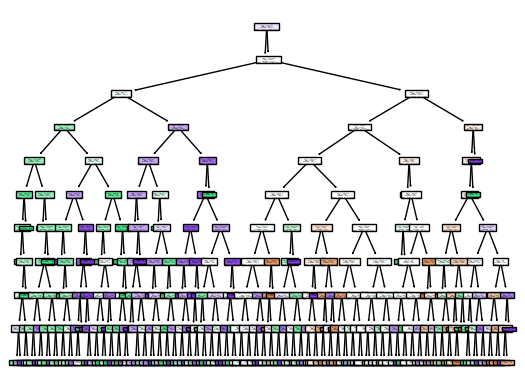

In [18]:
tr.plot_tree(modelo_treinado, filled = True);

#Apresentando o resultado

In [19]:
X_novo = X_atributos.sample()
previsao = 100*(modelo_treinado.predict_proba(X_novo))
print('Probabilidades - Aurora: {:.2f}% - Nova: {:.2f}% - Star: {:.2f}%'.format(previsao[0][0],previsao[0][1],previsao[0][2]))
X_novo.head()

Probabilidades - Aurora: 0.00% - Nova: 36.26% - Star: 63.74%


,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,salary,clv
51778,2017,4,0,0,0,0,0.0,60235.0,4834.71


#Painel de Visualização

In [ ]:
!pip install gradio

In [11]:
import gradio as gr
import numpy as np

In [24]:
def predict(*args):
  X_novo = np.array([args]).reshape(1, -1)
  previsao = (modelo_treinado.predict_proba(X_novo))

  return {"Aurora":previsao[0][0], "Nova":previsao[0][1], "Star":previsao[0][2]}

with gr.Blocks() as demo:
  # Titulo do painel
  gr.Markdown(""" # Propensão de Compra """)

  with gr.Row():
    with gr.Column():
      gr.Markdown(""" # Atributos do Cliente """)
      year = gr.Slider(label="Ano de Adesão", minimum=2017, maximum = 2018, step=1, randomize=True)
      month = gr.Slider(label="Mês de Adesão", minimum=1, maximum = 12, step=1, randomize=True)
      flights_booked = gr.Slider(label="Vôos agendados", minimum=0, maximum = 21, step=1, randomize=True)
      flights_with_companions = gr.Slider(label="Vôos com acompanhante", minimum=0,maximum=11,step= 1, randomize = True)
      total_flights = gr.Slider(label="Total de Vôos", minimum=0, maximum = 32, step=1, randomize=True)
      distance = gr.Slider(label="Distância percorrida", minimum=0, maximum = 6293, step=1, randomize=True)
      points_accumulated = gr.Slider(label="Pontos Acumulados", minimum=0.00, maximum = 676.50, step=0.1, randomize=True)
      salary = gr.Slider(label="Salário", minimum=58486.00, maximum = 407228.00, step=0.1, randomize=True)
      clv = gr.Slider(label="CLV", minimum=2119.89, maximum = 83325.38, step=0.1, randomize=True)

      with gr.Row():
        with gr.Row():
          gr.Markdown(""" # Botão de Previsão: """)
          predict_btn = gr.Button( value="Previsão" )

    with gr.Column():
      gr.Markdown(""" # Propensão de Compra do Cliente """)
      label = gr.Label()

  # Botao predict
  predict_btn.click(
      fn=predict,
      inputs=[
          year,
          month,
          flights_booked,
          flights_with_companions,
          total_flights,
          distance,
          points_accumulated,
          salary,
          clv
          ],
       outputs=[label]
      )

demo.launch(debug=True, share=False)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
